### Assignment

This Assignment includes some basic NLP operations on Amazon customer reviews.  


In [1]:
import pandas as pd
import numpy as np
import nltk

##### Import the dataset

In [2]:
data = pd.read_csv('Amazon_Unlocked_Mobile.csv',sep=",")

In [3]:
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
print("count of reviews : " + str(len(data)))
print("count of products : " + str(data['Product Name'].nunique()))

count of reviews : 2000
count of products : 73


#### Q1 : Tokenize and remove stop words
 - Create two columns , one with a list of word tokens and one with a list of sentence tokens

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [6]:
# Check Avg, Min, Max no of sentence in reviews
data.loc[:,'sentok'] = data.Reviews.apply(sent_tokenize)
sentlen = data.sentok.apply(len)
print(np.mean(sentlen))
print(np.min(sentlen))
print(np.max(sentlen))

3.5515
1
104


In [7]:
# Check word count summary before and after stop word removal

data.loc[:,'wordtok'] = data.Reviews.apply(word_tokenize)

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [8]:
# Word count summary
wrdcnt = data.wordtok.apply(len)
print(np.mean(wrdcnt))
print(np.min(wrdcnt))
print(np.max(wrdcnt))

60.1465
1
1949


In [9]:
# remove stop words
def stopw_rem(tok):
    clean_tokens = tok[:]

    for token in tok:
        if token in stop_words:
            clean_tokens.remove(token)
    return clean_tokens

data.loc[:,'wordtok2'] = data.wordtok.apply(stopw_rem)

In [10]:
wrdcnt = data.wordtok2.apply(len)
print(np.mean(wrdcnt))
print(np.min(wrdcnt))
print(np.max(wrdcnt))

37.793
0
1193


In [23]:
# convert to lower case
def conv_to_lower(tok):
    newtok = [item.lower() for item in tok]
    return newtok

data.loc[:,'wordtok'] = data.wordtok.apply(conv_to_lower)

#### Extract the Noun from all the reviews

In [31]:
from nltk.tag import PerceptronTagger
from nltk.data import find
#pos_iden(x)
PICKLE = "averaged_perceptron_tagger.pickle"
AP_MODEL_LOC = 'file:'+str(find('taggers/averaged_perceptron_tagger/'+PICKLE))
nltk.download('averaged_perceptron_tagger')
tagger = PerceptronTagger(load=False)
tagger.load(AP_MODEL_LOC)
pos_tag = tagger.tag


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [32]:
def noun_iden(tok):
    nountok = [word for (word, pos) in pos_tag(tok) if pos[:2] == 'NN'] 
    return nountok

In [34]:
data.loc[:,'nounlist'] = data.wordtok2.apply(noun_iden)

In [43]:
### Lemmatization

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet 
nltk.download('wordnet')
def lemm(tok):
    newtok = [lemmatizer.lemmatize(w) for w in tok]
    return newtok

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [44]:
sample_token = data.wordtok[20]
print(sample_token)
print(lemm(sample_token))

['the', 'battery', 'was', 'old', '&', 'had', 'been', 'over', 'used', 'because', 'it', 'barely', 'holds', 'a', 'charge', '.', 'otherwise', ',', 'no', 'issues', 'with', 'the', 'phone', 'itself', '.']
['the', 'battery', 'wa', 'old', '&', 'had', 'been', 'over', 'used', 'because', 'it', 'barely', 'hold', 'a', 'charge', '.', 'otherwise', ',', 'no', 'issue', 'with', 'the', 'phone', 'itself', '.']


In [45]:
# Identify the POS and lemmatize according using the parameter pos in lemmatization

def lemm2(tok):
    for word, tag in pos_tag(tok):
        if tag.startswith("NN"):
            yield lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            yield lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            yield lemmatizer.lemmatize(word, pos='a')
        else:
            yield word

print(' '.join(lemm2(sample_token)))

the battery be old & have be over use because it barely hold a charge . otherwise , no issue with the phone itself .


In [46]:
### Stemming

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

def stem(tok):
    newtok = [ps.stem(w) for w in tok]
    return newtok

In [47]:
### Check similarity between two reviews
from nltk.corpus import wordnet as wn
rv1 = data.Reviews[110]
rv2 = data.Reviews[6]
print(rv1)
print(rv2)

when i got phone it wouldn't work I took it to a Verizon store here the battery didn't work even when I charged it for 12 hrs Verizon put another used battery in phone it started to work
The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not including cost of purchase) I have a usable phone. The phone should not have been sold in the state it was in.


In [48]:
### Tokenize and tag
pos1 = pos_tag(word_tokenize(rv1))
pos2 = pos_tag(word_tokenize(rv2))
print(pos1)
print(pos2)

[('when', 'WRB'), ('i', 'NN'), ('got', 'VBD'), ('phone', 'NN'), ('it', 'PRP'), ('would', 'MD'), ("n't", 'RB'), ('work', 'VB'), ('I', 'PRP'), ('took', 'VBD'), ('it', 'PRP'), ('to', 'TO'), ('a', 'DT'), ('Verizon', 'NNP'), ('store', 'NN'), ('here', 'RB'), ('the', 'DT'), ('battery', 'NN'), ('did', 'VBD'), ("n't", 'RB'), ('work', 'VB'), ('even', 'RB'), ('when', 'WRB'), ('I', 'PRP'), ('charged', 'VBD'), ('it', 'PRP'), ('for', 'IN'), ('12', 'CD'), ('hrs', 'NN'), ('Verizon', 'NNP'), ('put', 'VBD'), ('another', 'DT'), ('used', 'VBN'), ('battery', 'NN'), ('in', 'IN'), ('phone', 'NN'), ('it', 'PRP'), ('started', 'VBD'), ('to', 'TO'), ('work', 'VB')]
[('The', 'DT'), ('charging', 'VBG'), ('port', 'NN'), ('was', 'VBD'), ('loose', 'JJ'), ('.', '.'), ('I', 'PRP'), ('got', 'VBD'), ('that', 'IN'), ('soldered', 'VBN'), ('in', 'IN'), ('.', '.'), ('Then', 'RB'), ('needed', 'VBD'), ('a', 'DT'), ('new', 'JJ'), ('battery', 'NN'), ('as', 'RB'), ('well', 'RB'), ('.', '.'), ('$', '$'), ('100', 'CD'), ('later', '

In [49]:
def penn_to_wn(tag):
    """ Convert between a Penn Treebank tag to a simplified Wordnet tag """
    if tag.startswith('N'):
        return 'n'
 
    if tag.startswith('V'):
        return 'v'
 
    if tag.startswith('J'):
        return 'a'
 
    if tag.startswith('R'):
        return 'r'
 
    return None

def tagged_to_synset(word, tag):
    wn_tag = penn_to_wn(tag)
    if wn_tag is None:
        return None
    try:
        return wn.synsets(word, wn_tag)[0]
    except:
        return None


# Get the synsets for the tagged words
synsets1 = [tagged_to_synset(*tagged_word) for tagged_word in pos1]
synsets2 = [tagged_to_synset(*tagged_word) for tagged_word in pos2]

print(synsets1)
print(synsets2)

[None, Synset('iodine.n.01'), Synset('get.v.01'), Synset('telephone.n.01'), None, None, None, Synset('work.v.01'), None, Synset('take.v.01'), None, None, None, None, Synset('shop.n.01'), Synset('here.r.01'), None, Synset('battery.n.01'), Synset('make.v.01'), None, Synset('work.v.01'), Synset('even.r.01'), None, None, Synset('charge.v.01'), None, None, None, Synset('hour.n.01'), None, Synset('put.v.01'), None, Synset('use.v.01'), Synset('battery.n.01'), None, Synset('telephone.n.01'), None, Synset('get_down.v.07'), None, Synset('work.v.01')]
[None, Synset('charge.v.01'), Synset('port.n.01'), Synset('be.v.01'), Synset('loose.a.01'), None, None, Synset('get.v.01'), None, Synset('solder.v.01'), None, None, Synset('then.r.01'), Synset('necessitate.v.01'), None, Synset('new.a.01'), Synset('battery.n.01'), Synset('equally.r.01'), Synset('well.r.01'), None, None, None, Synset('subsequently.r.01'), None, Synset('not.r.01'), Synset('include.v.01'), Synset('cost.n.01'), None, Synset('purchase.n.0

In [50]:
# Filter out the Nones
synsets1 = [ss for ss in synsets1 if ss]
synsets2 = [ss for ss in synsets2 if ss]

In [51]:
### Calculate the similarity score using wup (Wu and Palmer similarity) or path similarity

all_score = []
 
# For each word in the first sentence
for synset in synsets1:
    # Get the similarity value of the most similar word in the other sentence
    score = [synset.path_similarity(ss) for ss in synsets2]
    score = list(filter(None.__ne__, score))
    best_score = max(score) if len(score) > 0 else 0
    all_score.append(best_score)
    
print(np.mean([x for x in all_score if x > 0]))

0.5027568922305765


In [52]:
### Word Frequency
import re
import string
bag_of_words = sum(list(data.wordtok2),[])

### punctuation trimming
cleaned_tok = [tok for tok in bag_of_words if tok not in string.punctuation]
### Remove special characters
cleaned_tok = [re.sub('[^A-Za-z0-9]+', ' ', tok) for tok in cleaned_tok]
# Remove more words like blank, 'n t'
cleaned_tok = [tok for tok in cleaned_tok if tok not in [' ','n t','i']]

# Word Frequency
freq = pd.DataFrame.from_dict(nltk.FreqDist(cleaned_tok), orient='index')
freq.columns = ['f']
freq['word'] = freq.index
freq = freq.sort_values(by = ['f'], ascending = False)
freq.head()

,f,word
I,3132,I
phone,2850,phone
The,707,The
good,596,good
It,568,It


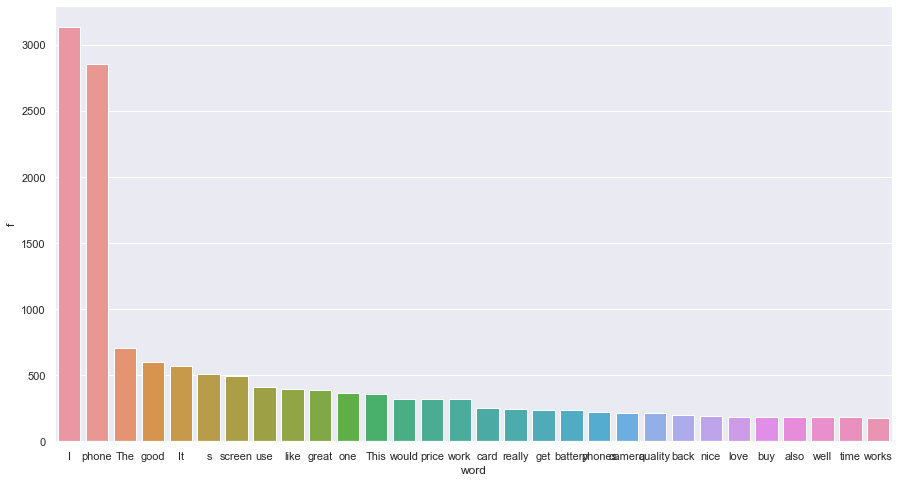

In [60]:
### Bar plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.barplot(x="word", y="f", data=freq.iloc[0:30,:])

plt.show()

[nltk_data] Error loading wordcloud: Package 'wordcloud' not found in
[nltk_data]     index


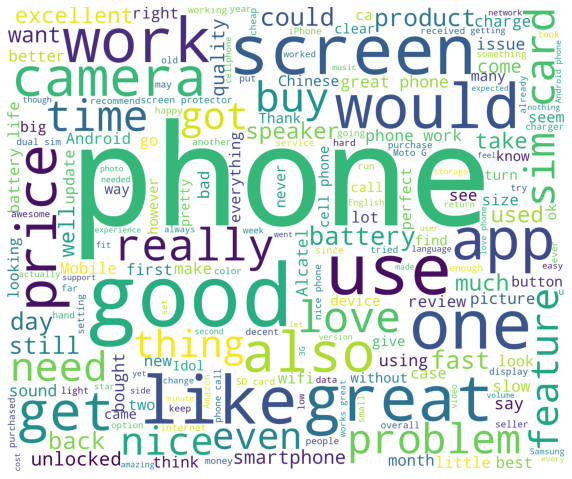

In [62]:
### Word Cloud
import wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stop_words,width=3000,height=2500,background_color='white',).generate("+".join(cleaned_tok))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

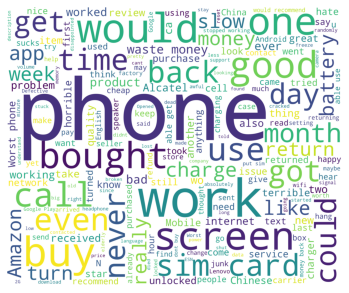

In [64]:
# wordcloud for rating 1 and 5

rat1 = sum(list(data.wordtok2[data.Rating == 1]),[])

### punctuation trimming
cleaned_tok1 = [tok for tok in rat1 if tok not in string.punctuation]
### Remove special characters
cleaned_tok1 = [re.sub('[^A-Za-z0-9]+', ' ', tok) for tok in cleaned_tok1]
# Remove more words like blank, 'n t'
cleaned_tok1 = [tok for tok in cleaned_tok1 if tok not in [' ','n t','i']]

### Rating 5

rat5 = sum(list(data.wordtok2[data.Rating == 5]),[])

### punctuation trimming
cleaned_tok5 = [tok for tok in rat5 if tok not in string.punctuation]
### Remove special characters
cleaned_tok5 = [re.sub('[^A-Za-z0-9]+', ' ', tok) for tok in cleaned_tok5]
# Remove more words like blank, 'n t'
cleaned_tok5 = [tok for tok in cleaned_tok5 if tok not in [' ','n t','i']]


wordcloud = WordCloud(stopwords=stop_words,width=3000,height=2500,background_color='white',).generate("+".join(cleaned_tok1))
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

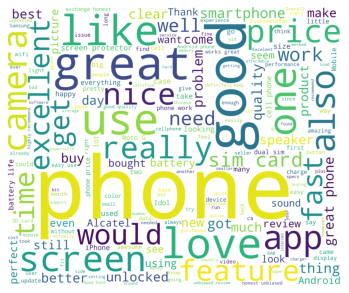

In [65]:
wordcloud = WordCloud(stopwords=stop_words,width=3000,height=2500,background_color='white',).generate("+".join(cleaned_tok5))
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [66]:
### TF-IDF
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)

In [67]:
data.loc[:,'review2'] = data.wordtok2.apply(lambda x : ' '.join(x))
corpus = list(data.review2)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()

In [68]:
# Check the score of the terms in first doc
doc = 0
feature_index = X[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [X[doc, x] for x in feature_index])

for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print(w, s)

would 0.09226906363692212
highly 0.15427740256284714
recommend 0.11277928145817862
said 0.15701719296787917
honesty 0.22938932037059584
appreciate 0.21377140464238542
really 0.10524586748271611
seller 0.266170422864592
thank 0.14217334058560377
upgrade 0.18700493810949356
want 0.12439904526260587
years 0.15701719296787917
apart 0.2081971292400447
fell 0.22938932037059584
finally 0.16456466066413591
old 0.13222391872890335
liked 0.16221166387051775
son 0.16221166387051775
my 0.12039877243638702
one 0.18250344919780478
sold 0.18700493810949356
upgraded 0.19257921351183427
someone 0.15798787351264493
line 0.1610997642799943
hard 0.14943988254690102
us 0.14728083029429906
phone 0.148540176264822
used 0.36746266816596973
found 0.14798370881401482
lucky 0.21377140464238542
feel 0.14870312716050643


In [69]:
### Top 10 terms
feature_array = np.array(feature_names)
tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

n = 10
top_n = feature_array[tfidf_sorting][:n]
print(top_n)

['impact' 'regular' 'case' 'faintly' 'fair' 'fairly' 'fairness' 'faith'
 'faithful' 'fake']


In [70]:
### Identify the most relevent doc for a particular term
term = 'phone'
# find the index of the term
term_index = feature_names.index(term)
term_score = X[:,term_index]
term_score = [term_score.toarray()[x][0] for x in range(len(term_score.toarray())) ]
max_index = term_score.index(max(term_score))
print(max_index)
print(data.Reviews[max_index])

261
Good phone
